In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Function to generate a random signal
def generate_random_signal(length, fs):
    t = np.arange(length) / fs
    signal = np.random.randn(length)
    return t, signal

# Function to create a band-pass filter
def band_pass_filter(data, fs, lowcut, highcut):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(4, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Parameters
fs = 1000  # Sample rate, Hz
length = 1000  # Length of the signal
lowcut = 1.0  # Low cut-off frequency, Hz
highcut = 50.0  # High cut-off frequency, Hz

# Generate random signal
t, signal = generate_random_signal(length, fs)

# Apply band-pass filter
filtered_signal = band_pass_filter(signal, fs, lowcut, highcut)

# Plot time-domain signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Band-Pass Filtered Signal', color='orange')
plt.title('Band-Pass Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency domain plot
plt.figure(figsize=(12, 6))

# Compute and plot the frequency response of the filter
w, h = freqz(*butter(4, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band'))
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of Band-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)

plt.show()

# Compute and plot the spectrum of the filtered signal
from scipy.fft import fft

N = len(filtered_signal)
yf = fft(filtered_signal)
xf = np.fft.fftfreq(N, 1 / fs)

plt.figure(figsize=(12, 6))
plt.plot(xf[:N//2], np.abs(yf[:N//2]), 'r')
plt.title('Frequency Spectrum of Band-Pass Filtered Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.show()


## xy plot as well..

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
from scipy.fft import fft

# Function to generate a random signal
def generate_random_signal(length, fs):
    t = np.arange(length) / fs
    signal = np.random.randn(length)
    return t, signal

# Function to create a band-pass filter
def band_pass_filter(data, fs, lowcut, highcut):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(4, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Parameters
fs = 1000  # Sample rate, Hz
length = 1000  # Length of the signal
lowcut = 5.0  # Low cut-off frequency, Hz
highcut = 50.0  # High cut-off frequency, Hz

# Generate two random signals
t, signal_x = generate_random_signal(length, fs)
_, signal_y = generate_random_signal(length, fs)

# Apply band-pass filter
filtered_signal_x = band_pass_filter(signal_x, fs, lowcut, highcut)
filtered_signal_y = band_pass_filter(signal_y, fs, lowcut, highcut)

# Plot time-domain signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, filtered_signal_x, label='Filtered Signal X', color='blue')
plt.title('Time Domain Signal X')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal_y, label='Filtered Signal Y', color='green')
plt.title('Time Domain Signal Y')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot x-y relationship
plt.subplot(3, 1, 3)
plt.plot(filtered_signal_x, filtered_signal_y, '.', color='purple')
plt.title('X-Y Plot')
plt.xlabel('Filtered Signal X')
plt.ylabel('Filtered Signal Y')
plt.grid(True)

plt.tight_layout()
plt.show()

# Frequency domain plot for one of the signals
plt.figure(figsize=(12, 6))

# Compute and plot the frequency response of the filter
w, h = freqz(*butter(4, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band'))
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.title('Frequency Response of Band-Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid(True)

plt.show()

# Compute and plot the spectrum of one of the filtered signals
yf_x = fft(filtered_signal_x)
xf = np.fft.fftfreq(len(filtered_signal_x), 1 / fs)

plt.figure(figsize=(12, 6))
plt.plot(xf[:len(filtered_signal_x)//2], np.abs(yf_x[:len(filtered_signal_x)//2]), 'r')
plt.title('Frequency Spectrum of Filtered Signal X')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

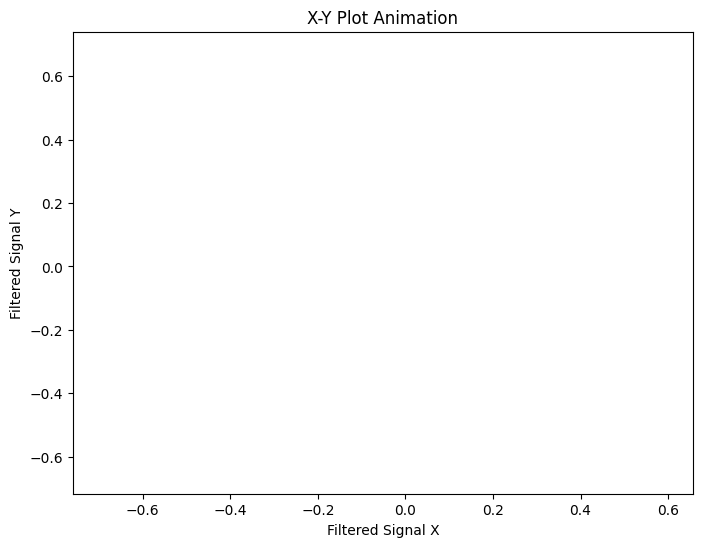

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.signal import butter, lfilter
from IPython.display import display
import ipywidgets as widgets

# Function to generate a random signal
def generate_random_signal(length, fs):
    t = np.arange(length) / fs
    signal = np.random.randn(length)
    return t, signal

# Function to create a band-pass filter
def band_pass_filter(data, fs, lowcut, highcut):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(4, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Parameters
fs = 1000  # Sample rate, Hz
length = 1000  # Length of the signal
lowcut = 5.0  # Low cut-off frequency, Hz
highcut = 50.0  # High cut-off frequency, Hz

# Generate two random signals
t, signal_x = generate_random_signal(length, fs)
_, signal_y = generate_random_signal(length, fs)

# Apply band-pass filter
filtered_signal_x = band_pass_filter(signal_x, fs, lowcut, highcut)
filtered_signal_y = band_pass_filter(signal_y, fs, lowcut, highcut)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize line objects for animation
line, = ax.plot([], [], 'o', markersize=2, color='purple')
ax.set_xlim(np.min(filtered_signal_x), np.max(filtered_signal_x))
ax.set_ylim(np.min(filtered_signal_y), np.max(filtered_signal_y))
ax.set_xlabel('Filtered Signal X')
ax.set_ylabel('Filtered Signal Y')
ax.set_title('X-Y Plot Animation')

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    x = filtered_signal_x[:i]
    y = filtered_signal_y[:i]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(filtered_signal_x), interval=30, blit=True
)

# Create a widget for displaying the animation
def display_animation():
    # Using IPython widgets to display the animation
    from matplotlib.backends.backend_agg import FigureCanvasAgg
    from IPython.display import display

    canvas = FigureCanvasAgg(fig)
    ani._fig.canvas = canvas
    ani._fig.canvas.draw()
    display(canvas.figure)

display_animation()


In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.signal import butter, lfilter
import ipywidgets as widgets
from IPython.display import display

# Function to generate a random signal
def generate_random_signal(length, fs):
    t = np.arange(length) / fs
    signal = np.random.randn(length)
    return t, signal

# Function to create a band-pass filter
def band_pass_filter(data, fs, lowcut, highcut):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(4, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

# Parameters
fs = 1000  # Sample rate, Hz
length = 1000  # Length of the signal
lowcut = 5.0  # Low cut-off frequency, Hz
highcut = 50.0  # High cut-off frequency, Hz

# Generate two random signals
t, signal_x = generate_random_signal(length, fs)
_, signal_y = generate_random_signal(length, fs)

# Apply band-pass filter
filtered_signal_x = band_pass_filter(signal_x, fs, lowcut, highcut)
filtered_signal_y = band_pass_filter(signal_y, fs, lowcut, highcut)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize line objects for animation
line, = ax.plot([], [], 'o', markersize=2, color='purple')
ax.set_xlim(np.min(filtered_signal_x), np.max(filtered_signal_x))
ax.set_ylim(np.min(filtered_signal_y), np.max(filtered_signal_y))
ax.set_xlabel('Filtered Signal X')
ax.set_ylabel('Filtered Signal Y')
ax.set_title('X-Y Plot Animation')

# Initialization function for the animation
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    x = filtered_signal_x[:i]
    y = filtered_signal_y[:i]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(filtered_signal_x), interval=30, blit=True
)

# Display the animation using ipywidgets
def display_animation(ani):
    from matplotlib.backends.backend_agg import FigureCanvasAgg
    from IPython.display import display, HTML
    
    canvas = FigureCanvasAgg(fig)
    ani._fig.canvas = canvas
    ani._fig.canvas.draw()

    # Create an interactive widget
    html = ani.to_jshtml()
    display(HTML(html))

display_animation(ani)


<IPython.core.display.Javascript object>

KeyboardInterrupt: 